
# Project: Investigate a Dataset (Investigating TMDB Dataset)

Created: 5/16/2020 <br/>
By:      Jalal Tareen

Dataset overview: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The source of the original dataset is at https://www.kaggle.com/tmdb/tmdb-movie-metadata/home.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

As an individual, I am huge movie fanatics and enjoy great films such as the Avangers, Extraction, or Star Wars. As data analyst I wanted to dig deeper into the business and production side of movies and explore the popularity behind what makes a popular movie. Basically I wanted to to examine whether there are any trends among films that lead them to higher ratings. A useful analysis would help us predict how well a genre of film does at the box office.

   #### Overview
   
   To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns.

#### Questions
1. Number of movies produced per year per genre
2. Which Genres are most popular one?
3. Total Earnings per genre?
4. Profits vs Release Year

#### Methodology

This reports consist of 4 steps. Which are as follows:

1. Loading Dataset
2. Investigating Dataset
3. Cleaning Dataset
4. Exploring with Visuals

Step one is self explanatory. In step one i loaded data by using pandas and read it as dataframe. Step 2 and 3 are from Data Wrangling proceess. In this I checked which columns have null values or which rows are duplicated. After that dropping some of null values. In the end using proper plots to answer the questions  


## Loading Dataset

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics (From Wikipedia)

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

This shows that our dataset has total number of 10866 movies with 21 columns. Here colums shows attributes like id of movie, budget, Earnings and other details.

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

. Some attributes like **original title**, **genre**, **release_year** looks important for our resarch

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.drop('id', axis=1, inplace= True)

In [9]:
df.drop('imdb_id', axis=1, inplace= True)

In [10]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

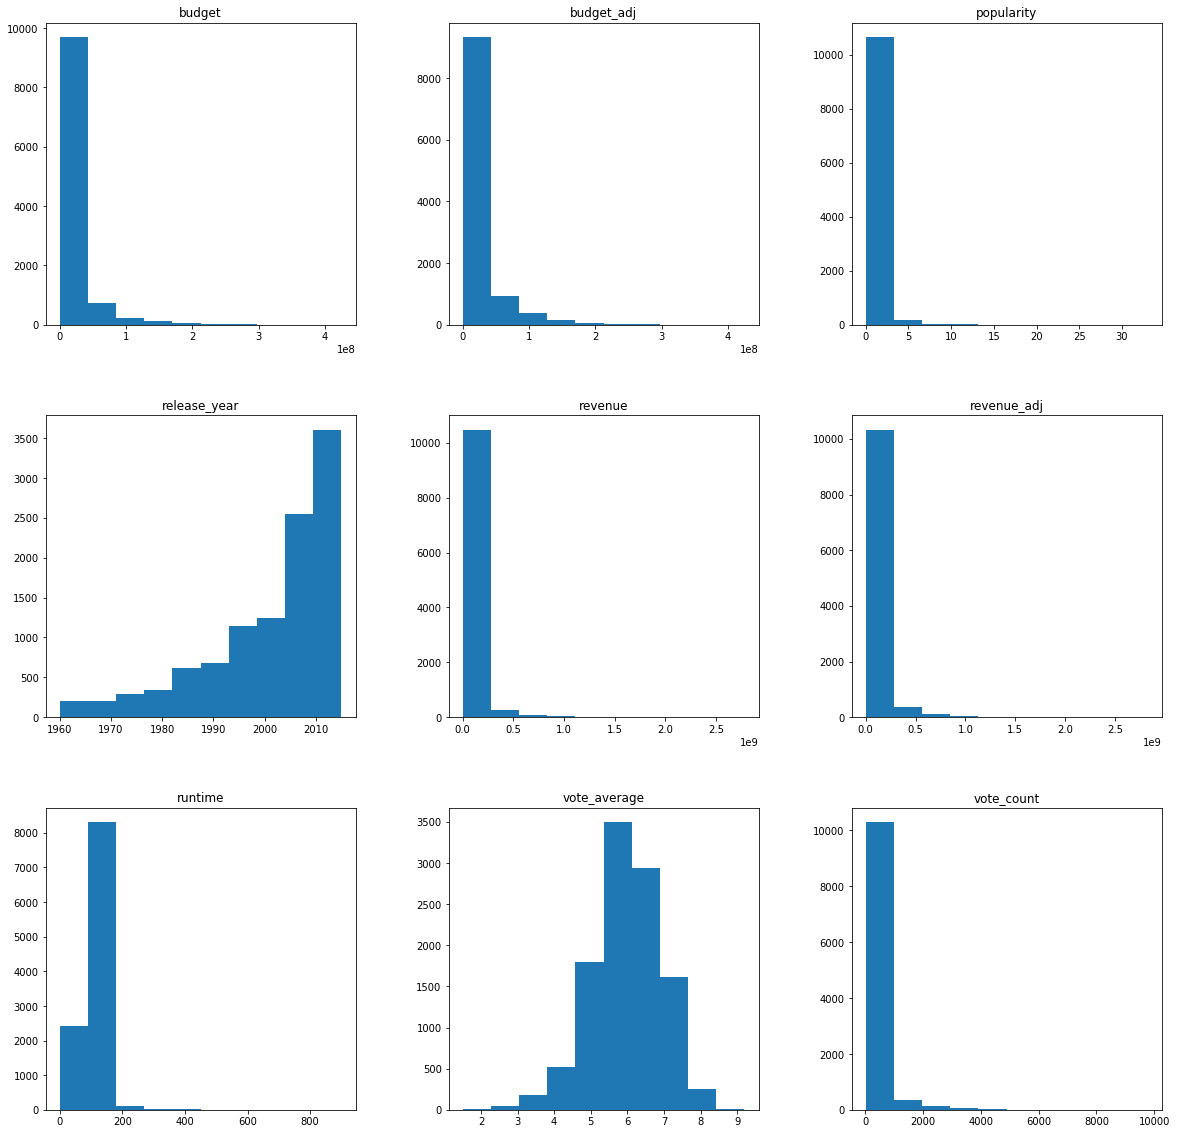

In [11]:
df.hist(figsize=(20,20), grid=False);

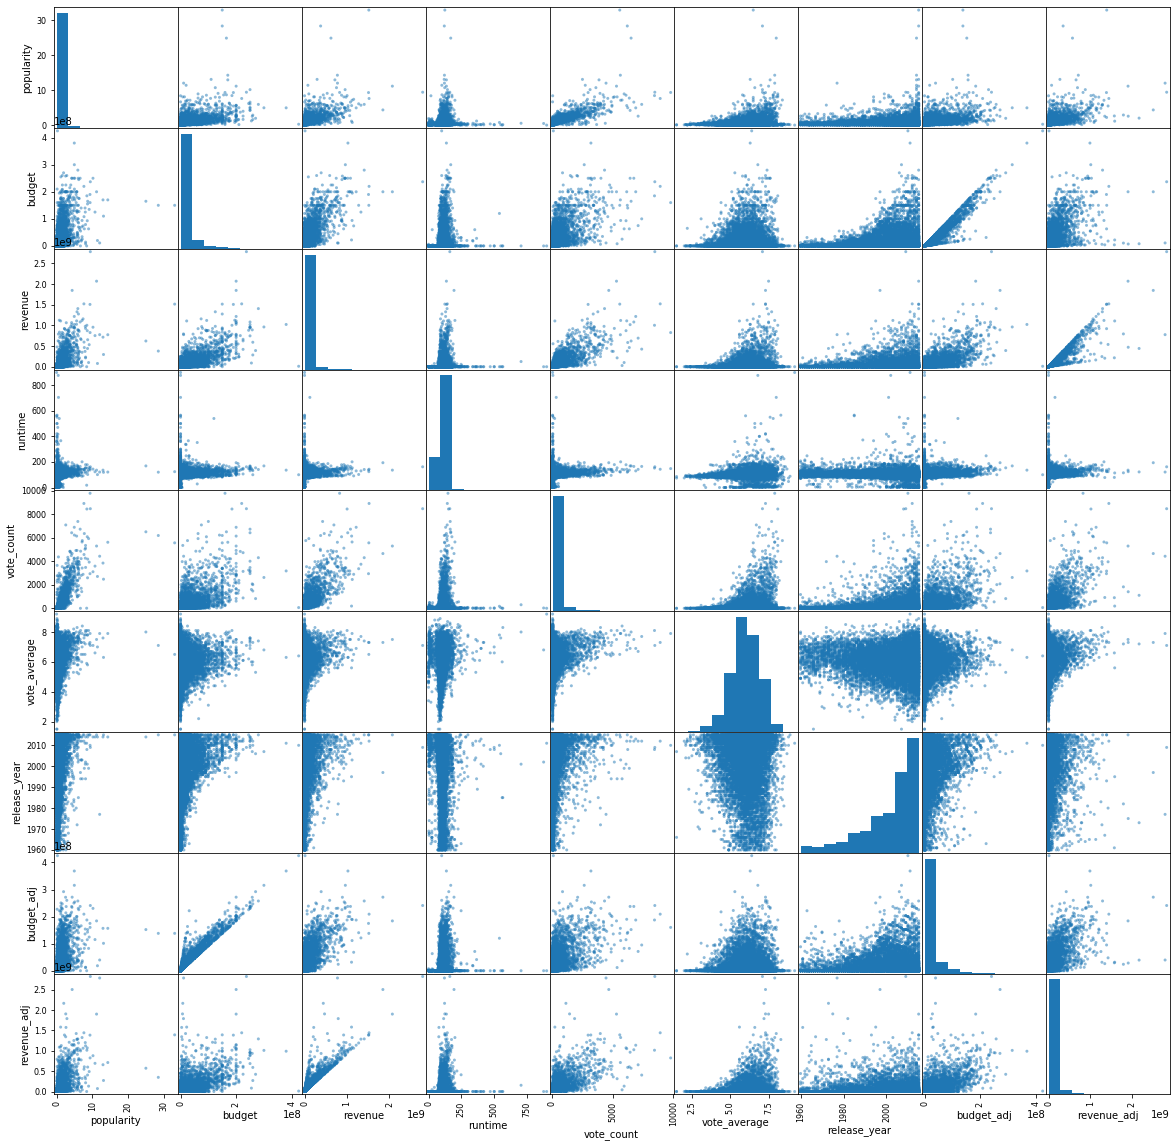

In [12]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

In [13]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here few columns have many null values. Most important is **genres**

In [14]:
df.duplicated().sum()

1

Only one row is duplicate. Thats too easy to deal with.

### Data Cleaning 

In [15]:
# Drop extraneous columns
columns = ['homepage', 'tagline', 'overview']
df.drop(columns, axis=1, inplace=True)

In [16]:
# Confirm action
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [17]:
#drop the null values in cast, director, genres columns
columns = ['cast', 'director', 'genres']
df.dropna(subset = columns, how='any', inplace=True)

In [18]:
# Confirm rows dropped
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

In [20]:
# Confirm values changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10732 non-null  float64
 1   budget                5154 non-null   float64
 2   revenue               4844 non-null   float64
 3   original_title        10732 non-null  object 
 4   cast                  10732 non-null  object 
 5   director              10732 non-null  object 
 6   keywords              9307 non-null   object 
 7   runtime               10732 non-null  int64  
 8   genres                10732 non-null  object 
 9   production_companies  9773 non-null   object 
 10  release_date          10732 non-null  object 
 11  vote_count            10732 non-null  int64  
 12  vote_average          10732 non-null  float64
 13  release_year          10732 non-null  int64  
 14  budget_adj            5154 non-null   float64
 15  revenue_adj        

In [21]:
df.drop_duplicates(inplace=True)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [22]:
df.shape

(10731, 16)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   budget                5153 non-null   float64
 2   revenue               4843 non-null   float64
 3   original_title        10731 non-null  object 
 4   cast                  10731 non-null  object 
 5   director              10731 non-null  object 
 6   keywords              9306 non-null   object 
 7   runtime               10731 non-null  int64  
 8   genres                10731 non-null  object 
 9   production_companies  9772 non-null   object 
 10  release_date          10731 non-null  object 
 11  vote_count            10731 non-null  int64  
 12  vote_average          10731 non-null  float64
 13  release_year          10731 non-null  int64  
 14  budget_adj            5153 non-null   float64
 15  revenue_adj        

In [24]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,5.153000e+03,4.843000e+03,10731.000000,10731.000000,10731.000000,10731.000000,5.153000e+03,4.843000e+03
mean,0.652615,3.082824e+07,8.933981e+07,102.468829,219.812972,5.964710,2001.259622,3.699582e+07,1.152341e+08
std,1.004804,3.893199e+07,1.621546e+08,30.493873,578.815324,0.930283,12.820151,4.198202e+07,1.989424e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,8.142944e+06,1.048057e+07
50%,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,2.287867e+07,4.402879e+07
75%,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000,5.024535e+07,1.317599e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
df_genre = df
# columns to split by "|"
df_genre['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [26]:
# Check new row count
df_genre.shape

(10731, 16)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How many movies produced each year by Genre?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [27]:
df_genres_year = df_genre.groupby(['release_year', 'genres']).count()['original_title'].unstack()

In [28]:
df_genre.groupby(['genres']).count()['original_title'].sort_values(ascending=False)

genres
Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: original_title, dtype: int64

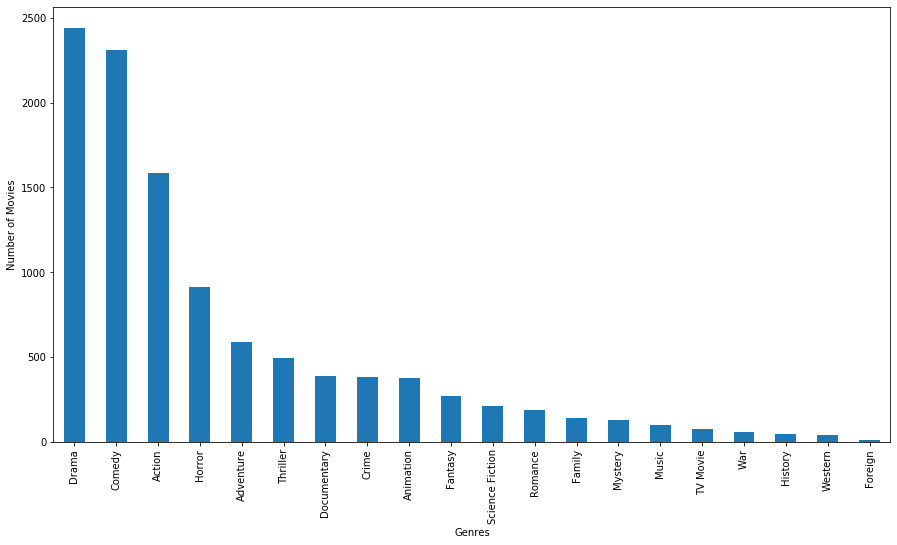

In [29]:
ax = df_genre.groupby(['genres']).count()['original_title'].sort_values(ascending=False).plot(kind="bar", 
                                                                                              figsize=(15,8))
ax.set_xlabel("Genres")
ax.set_ylabel("Number of Movies");

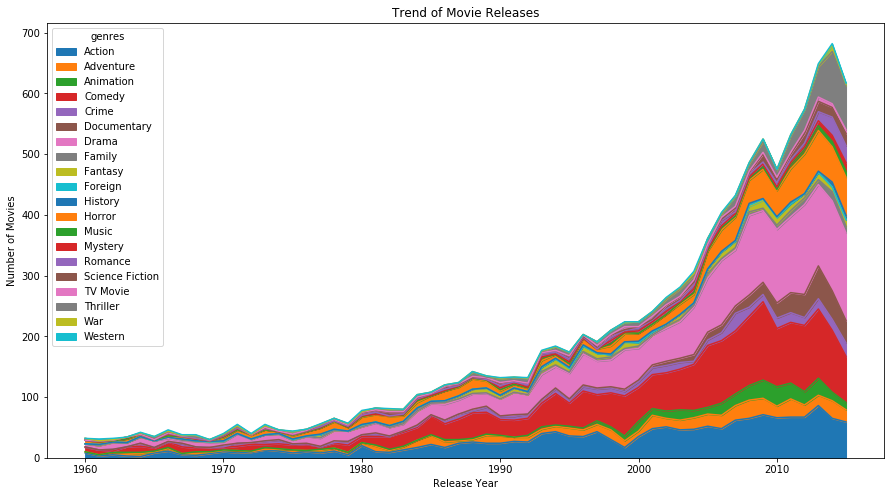

In [30]:
# use unstack()
ay = df_genre.groupby(['release_year', 'genres']).count()['original_title'].unstack().plot(kind='area', 
                                                                                          figsize=(15,8));
ay.set(xlabel='Release Year', ylabel='Number of Movies', title = 'Trend of Movie Releases');


### Which movie genres are popular?

In [ ]:
df_genres_popularity = df_genre.groupby(['popularity', 'genres']).count()['original_title'].unstack()

In [35]:
genre_year = df_genre.groupby(['genres']).mean().sort_index()
genre_year['popularity']

genres
Action             0.837782
Adventure          1.219834
Animation          0.853208
Comedy             0.538260
Crime              0.694063
Documentary        0.184773
Drama              0.554173
Family             0.739779
Fantasy            0.868512
Foreign            0.178917
History            0.764636
Horror             0.468638
Music              0.462125
Mystery            0.596896
Romance            0.707231
Science Fiction    1.087261
TV Movie           0.245873
Thriller           0.673381
War                0.777887
Western            0.690646
Name: popularity, dtype: float64

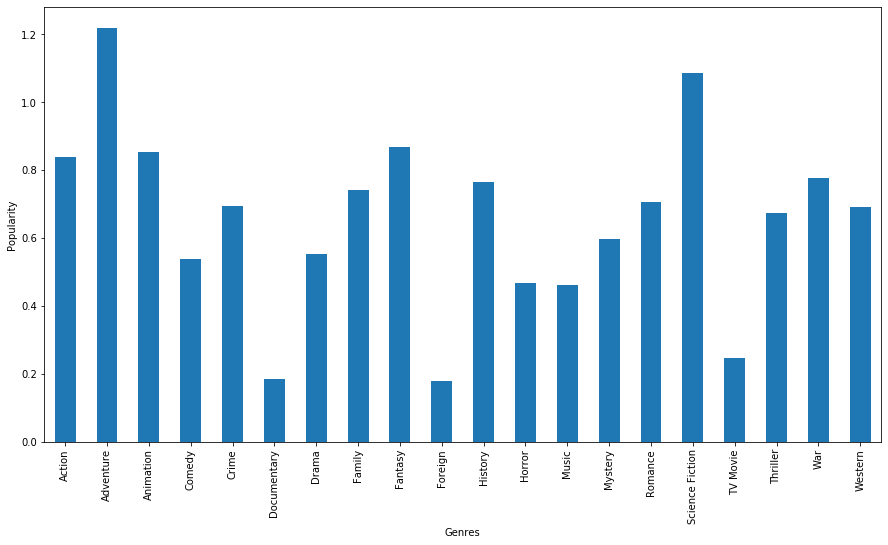

In [37]:
ax = genre_year['popularity'].plot(kind="bar", 
                                                                                              figsize=(15,8))
ax.set_xlabel("Genres")
ax.set_ylabel("Popularity");

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!